## Cargamos todas las librerías y funciones necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.utils import resample

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.preprocessing import LabelEncoder

# Librería necesaria para poder separar en conjuntos de training y testing
from sklearn.model_selection import train_test_split

In [3]:
import category_encoders as ce

In [4]:
from sklearn import tree

In [5]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_score, accuracy_score, f1_score

In [112]:
from scipy.stats import kstest

#### Importamos las funciones de clasificador de Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

## Lectura del fichero csv

In [6]:
df_selected = pd.read_csv("../data/df_selected.csv")

In [7]:
# Echamos un vistazo rápido a la pinta que tiene el data frame
df_selected

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
0,11575.0,11575.0,11575.0,36,7.35,359.26,A,A4,6,OWN,...,0,8.0,2.0,1.0,0.0,0,Jun,2017,1994,23
1,7200.0,7200.0,7200.0,36,24.85,285.70,E,E3,2,RENT,...,0,2.0,0.0,0.0,0.0,0,Jun,2017,2000,17
2,7500.0,7500.0,7500.0,36,7.35,232.79,A,A4,7,MORTGAGE,...,0,13.0,4.0,0.0,0.0,0,Jun,2017,2013,4
3,10000.0,10000.0,10000.0,60,16.02,243.29,C,C5,7,RENT,...,0,7.0,0.0,2.0,0.0,0,Jun,2017,2006,11
4,14000.0,14000.0,14000.0,36,16.02,492.34,C,C5,7,MORTGAGE,...,0,5.0,1.0,0.0,0.0,0,Jun,2017,2008,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442330,11575.0,11575.0,11575.0,36,15.59,404.61,D,D1,10,RENT,...,0,1.0,0.0,0.0,0.0,0,Jan,2015,1999,16
442331,12000.0,12000.0,12000.0,36,11.99,398.52,B,B5,1,MORTGAGE,...,0,11.0,1.0,0.0,0.0,0,Jan,2015,1995,20
442332,13000.0,13000.0,13000.0,60,15.99,316.07,D,D2,5,RENT,...,0,7.0,0.0,1.0,0.0,0,Jan,2015,2003,12
442333,12000.0,12000.0,12000.0,60,19.99,317.86,E,E3,1,RENT,...,0,6.0,0.0,0.0,0.0,0,Jan,2015,2003,12


In [8]:
df_selected.describe(include = "all")

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
count,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335,442335,442335.000000,442335,...,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335,442335.000000,442335.000000,442335.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,35,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,C,C1,NaN,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,Oct,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,124885,26548,NaN,220364,...,NaN,NaN,NaN,NaN,NaN,NaN,56111,NaN,NaN,NaN
mean,14566.416856,14566.416856,14561.066882,42.140378,13.255884,439.935320,NaN,NaN,5.767755,NaN,...,0.002258,4.795908,1.776111,0.147868,0.056475,0.000020,NaN,2014.599414,1998.159006,16.440408
std,8500.018979,8500.018979,8496.756229,10.472109,4.471144,252.505972,NaN,NaN,3.722447,NaN,...,0.047470,3.143748,2.089641,0.397284,0.419215,0.004511,NaN,0.670304,7.464446,7.429709
min,1000.000000,1000.000000,900.000000,36.000000,5.320000,14.010000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2014.000000,1944.000000,3.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,256.900000,NaN,NaN,2.000000,NaN,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,2014.000000,1994.000000,11.000000
50%,12500.000000,12500.000000,12500.000000,36.000000,12.990000,378.760000,NaN,NaN,6.000000,NaN,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,NaN,2015.000000,2000.000000,15.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,15.990000,579.720000,NaN,NaN,10.000000,NaN,...,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000,NaN,2015.000000,2003.000000,20.000000


In [9]:
# filtro el df_selected en función de si la variable loan_status toma el valor 0 o 1
df_major = df_selected[df_selected.loan_status == 0]
df_minor = df_selected[df_selected.loan_status == 1]

In [10]:
df_minor_upsmapled = resample(df_minor, replace = True, n_samples = 358436, random_state = 12345)
df_minor_upsmapled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
400464,28250.0,28250.0,28250.0,36,15.61,987.76,D,D1,2,MORTGAGE,...,0,9.0,3.0,0.0,0.0,0,Apr,2015,1994,21
366148,12175.0,12175.0,12175.0,60,25.80,363.09,G,G1,1,RENT,...,0,8.0,1.0,0.0,0.0,0,May,2015,1997,18
22099,2000.0,2000.0,2000.0,36,18.54,72.85,E,E1,2,MORTGAGE,...,0,20.0,2.0,1.0,0.0,0,Dec,2014,1988,26
396340,5000.0,5000.0,5000.0,36,14.65,172.48,C,C5,6,OWN,...,0,3.0,0.0,0.0,0.0,0,Mar,2015,1981,34
32729,12400.0,12400.0,12400.0,60,8.67,255.43,B,B1,1,RENT,...,0,1.0,0.0,0.0,0.0,0,Nov,2014,1983,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157970,21075.0,21075.0,20975.0,60,19.47,552.17,D,D5,1,OWN,...,0,4.0,6.0,0.0,0.0,0,May,2014,1994,20
243800,10000.0,10000.0,10000.0,36,12.05,332.39,C,C1,1,OWN,...,0,3.0,0.0,0.0,0.0,0,Dec,2015,2005,10
21700,5825.0,5825.0,5825.0,36,18.54,212.17,E,E1,10,OWN,...,0,4.0,0.0,0.0,2.0,0,Dec,2014,2003,11
236605,35000.0,35000.0,34750.0,36,14.48,1204.40,C,C5,1,MORTGAGE,...,0,5.0,0.0,0.0,1.0,0,Dec,2015,2000,15


In [11]:
df_minor_upsmapled = pd.concat([df_minor_upsmapled, df_major])
df_minor_upsmapled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
400464,28250.0,28250.0,28250.0,36,15.61,987.76,D,D1,2,MORTGAGE,...,0,9.0,3.0,0.0,0.0,0,Apr,2015,1994,21
366148,12175.0,12175.0,12175.0,60,25.80,363.09,G,G1,1,RENT,...,0,8.0,1.0,0.0,0.0,0,May,2015,1997,18
22099,2000.0,2000.0,2000.0,36,18.54,72.85,E,E1,2,MORTGAGE,...,0,20.0,2.0,1.0,0.0,0,Dec,2014,1988,26
396340,5000.0,5000.0,5000.0,36,14.65,172.48,C,C5,6,OWN,...,0,3.0,0.0,0.0,0.0,0,Mar,2015,1981,34
32729,12400.0,12400.0,12400.0,60,8.67,255.43,B,B1,1,RENT,...,0,1.0,0.0,0.0,0.0,0,Nov,2014,1983,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442326,13150.0,13150.0,13150.0,60,14.99,312.77,C,C5,8,MORTGAGE,...,0,0.0,3.0,0.0,0.0,0,Jan,2015,1994,21
442327,12000.0,12000.0,12000.0,36,9.49,384.34,B,B2,4,RENT,...,0,3.0,0.0,0.0,0.0,0,Jan,2015,2006,9
442328,4000.0,4000.0,4000.0,36,8.67,126.59,B,B1,10,MORTGAGE,...,0,8.0,1.0,1.0,0.0,0,Jan,2015,2002,13
442330,11575.0,11575.0,11575.0,36,15.59,404.61,D,D1,10,RENT,...,0,1.0,0.0,0.0,0.0,0,Jan,2015,1999,16


In [12]:
df_minor_upsmapled.loan_status.value_counts()

1    358436
0    345335
Name: loan_status, dtype: int64

In [13]:
df_minor_upsmapled.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status       int64
loan_status               int64
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs             float64
fico_range_low          float64
fico_range_high         float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int64
application_type          int64
acc_open_past_24mths    float64
mort_acc                float64
pub_rec_bankruptcies    float64
tax_liens               float64
disbursement_method       int64
issue_mo

In [14]:
X = df_minor_upsmapled.drop("loan_status", axis = 1)
Y = df_minor_upsmapled.loan_status

In [15]:
Y = LabelEncoder().fit_transform(Y)

### Separamos en training y testing

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

In [17]:
xtrain

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
405387,13000.0,13000.0,13000.0,60,7.89,262.91,A,A5,1,MORTGAGE,...,0,6.0,5.0,0.0,0.0,0,Feb,2015,2002,13
234295,10000.0,10000.0,10000.0,36,11.99,332.10,C,C1,10,OWN,...,0,3.0,2.0,0.0,0.0,0,Dec,2015,1997,18
312077,25000.0,25000.0,25000.0,60,9.17,521.03,B,B2,5,MORTGAGE,...,0,4.0,8.0,0.0,0.0,0,Jul,2015,1992,23
292927,35000.0,35000.0,35000.0,60,16.99,869.66,D,D3,10,RENT,...,0,3.0,1.0,0.0,0.0,0,Sep,2015,1990,25
158822,35000.0,35000.0,35000.0,36,20.49,1309.49,E,E2,2,MORTGAGE,...,0,14.0,1.0,0.0,0.0,0,May,2014,1998,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,12000.0,12000.0,11750.0,36,10.91,392.36,B,B4,10,MORTGAGE,...,0,2.0,0.0,0.0,0.0,0,Jun,2017,2003,14
373782,18000.0,18000.0,18000.0,60,9.99,382.36,B,B3,1,MORTGAGE,...,0,4.0,6.0,0.0,0.0,0,Apr,2015,2001,14
412304,12000.0,12000.0,12000.0,60,16.55,295.34,D,D2,10,RENT,...,0,6.0,0.0,0.0,0.0,0,Feb,2015,2002,13
92961,25000.0,25000.0,25000.0,60,14.99,594.62,C,C5,10,MORTGAGE,...,0,2.0,1.0,0.0,0.0,0,Aug,2014,1985,29


In [18]:
cat_xtrain = xtrain.select_dtypes(include=['object']).columns
cat_xtrain

Index(['grade', 'sub_grade', 'home_ownership', 'purpose', 'addr_state',
       'issue_month'],
      dtype='object')

In [19]:
ohe = ce.OneHotEncoder(cols=cat_xtrain)
model = ohe.fit(xtrain)

In [20]:
x_train_t = model.transform(xtrain)

In [21]:
x_test_t = model.transform(xtest)

## Modelo de árbol de decisión

In [22]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_t, ytrain)
clf

DecisionTreeClassifier()

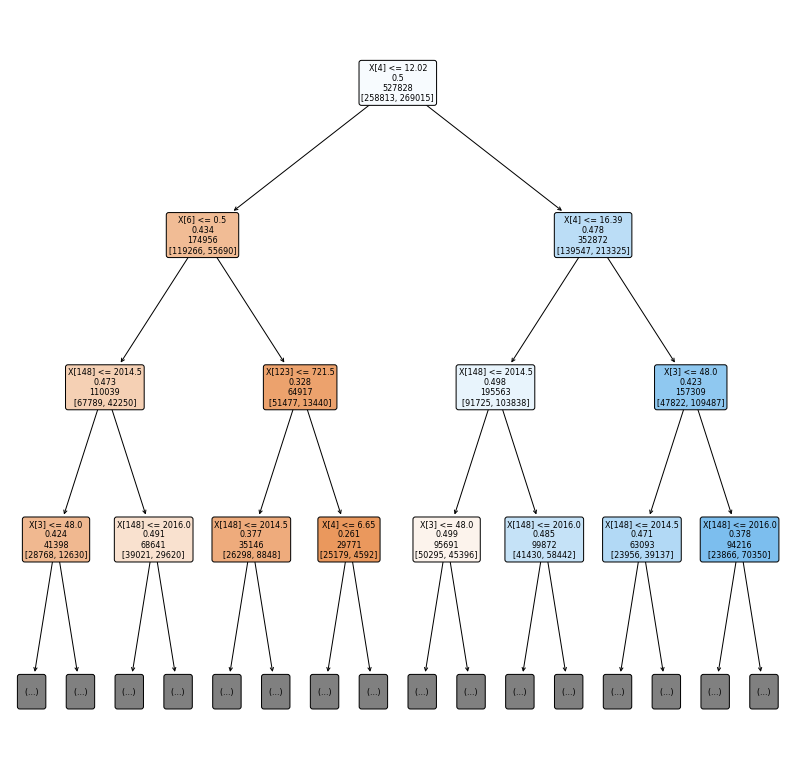

In [23]:
plt.figure(figsize=(14, 14))
tree.plot_tree(clf, max_depth=3, filled=True, rounded=True, fontsize=8, label="none")
plt.show()

In [24]:
predicted_tree = clf.predict(x_test_t)
predicted_tree

array([0, 1, 0, ..., 1, 0, 1])

In [25]:
predictions_proba = clf.predict_proba(x_test_t)
predictions_proba

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [26]:
print('--------------------------------------------------------')
score_tree = clf.score(x_test_t, ytest)
print('Accuracy Score: ', score_tree)
print('--------------------------------------------------------')
    
# Look at classification report to evaluate the model
print(classification_report(ytest, predicted_tree))

--------------------------------------------------------
Accuracy Score:  0.8664396992207704
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     86522
           1       0.81      0.96      0.88     89421

    accuracy                           0.87    175943
   macro avg       0.88      0.86      0.86    175943
weighted avg       0.88      0.87      0.87    175943



## Creación de una función para calcular los diferentes clasificadores de Bayes

In [27]:
def mfunc(X_train, y_train, X_test, y_test, typ):
    
    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)
        
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    
    # We plot two confussion matrix
    
    cm = confusion_matrix(ytest, predicted)
    cm_norm = confusion_matrix(ytest, predicted, normalize="true")

    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title("Confusion matrix")

    plt.figure(figsize=(6,6))
    sns.heatmap(cm_norm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title("Normalized confusion matrix")
    
    # Return relevant data for chart plotting
    return clf, pred_labels

## Clasificador Naive Bayes (Gaussian)

### Comprobación de normalidad en alguna de las variables

In [113]:
fl_columns = xtrain.select_dtypes(include=['float64']).columns
float_xtrain = xtrain[list(fl_columns)]
float_xtrain

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens
405387,13000.0,13000.0,13000.0,7.89,262.91,75000.0,24.37,0.0,735.0,739.0,14.0,0.0,12879.0,31.0,45.0,6.0,5.0,0.0,0.0
234295,10000.0,10000.0,10000.0,11.99,332.10,150000.0,9.86,0.0,670.0,674.0,5.0,0.0,41612.0,100.3,16.0,3.0,2.0,0.0,0.0
312077,25000.0,25000.0,25000.0,9.17,521.03,125000.0,10.72,3.0,725.0,729.0,13.0,0.0,31079.0,46.5,31.0,4.0,8.0,0.0,0.0
292927,35000.0,35000.0,35000.0,16.99,869.66,108000.0,30.00,0.0,715.0,719.0,13.0,0.0,46243.0,75.4,44.0,3.0,1.0,0.0,0.0
158822,35000.0,35000.0,35000.0,20.49,1309.49,190000.0,16.12,0.0,660.0,664.0,19.0,0.0,48189.0,89.1,34.0,14.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,12000.0,12000.0,11750.0,10.91,392.36,65000.0,20.16,0.0,680.0,684.0,10.0,0.0,9690.0,54.1,16.0,2.0,0.0,0.0,0.0
373782,18000.0,18000.0,18000.0,9.99,382.36,90000.0,24.99,0.0,770.0,774.0,12.0,0.0,3800.0,27.0,42.0,4.0,6.0,0.0,0.0
412304,12000.0,12000.0,12000.0,16.55,295.34,65000.0,31.76,0.0,660.0,664.0,14.0,0.0,18610.0,71.0,27.0,6.0,0.0,0.0,0.0
92961,25000.0,25000.0,25000.0,14.99,594.62,79000.0,28.30,3.0,690.0,694.0,17.0,0.0,12775.0,32.8,47.0,2.0,1.0,0.0,0.0


In [122]:
for column in float_xtrain:
    print(kstest(float_xtrain[column], 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9999999481163739, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9842550841701092, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9964656782545843, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.99734247336588, pvalue=0.0)
KstestResult(statistic=0.9881861313846665, pvalue=0.0)
KstestResult(statistic=0.9997618220931169, pvalue=0.0)
KstestResult(statistic=0.8720356694871368, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)


#### Rechazamos hipótesis nula, luego no tenemos variables normales. El clasificador de Bayes Gaussiano no tiene sentido para nuestro dataset. Se podría jugar con las variables en logaritmo ?¿?¿?¿

In [123]:
model_gauss = GaussianNB()

In [126]:
model_gauss.fit(x_train_t, ytrain)

GaussianNB()

In [127]:
predicted = model_gauss.predict(x_test_t)
predicted

array([1, 1, 0, ..., 1, 1, 1])

In [128]:
print('--------------------------------------------------------')
score = model_gauss.score(x_test_t, ytest)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
    
# Look at classification report to evaluate the model
print(classification_report(ytest, predicted))

--------------------------------------------------------
Accuracy Score:  0.6387068539242823
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.56      0.60     86522
           1       0.63      0.72      0.67     89421

    accuracy                           0.64    175943
   macro avg       0.64      0.64      0.64    175943
weighted avg       0.64      0.64      0.64    175943



In [ ]:
#### Chequeamos el overfitting

In [130]:
print('Score del conjunto de training: {:.4f}'.format(model_gauss.score(x_train_t, ytrain)))
print('--------------------------------------')
print('Score del conjunto de testing: {:.4f}'.format(model_gauss.score(x_test_t, ytest)))

Score del conjunto de training: 0.6398
--------------------------------------
Score del conjunto de testing: 0.6387


In [ ]:
### Matriz de confusión

Text(0.5, 1.0, 'Normalized confusion matrix')

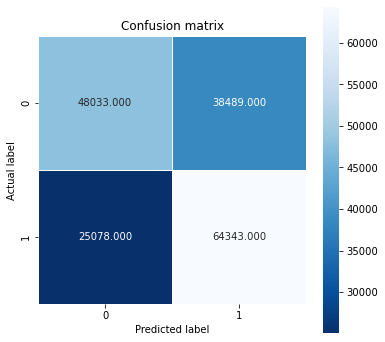

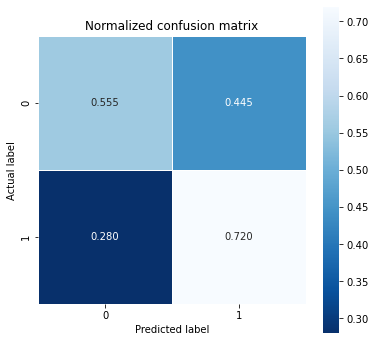

In [131]:
cm = confusion_matrix(ytest, predicted)
cm_norm = confusion_matrix(ytest, predicted, normalize="true")

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Confusion matrix")

plt.figure(figsize=(6,6))
sns.heatmap(cm_norm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Normalized confusion matrix")

## Clasificador Naive Bayes (Multinomial)

In [101]:
from sklearn.naive_bayes import MultinomialNB

In [103]:
model3 = MultinomialNB()

In [106]:
numeric = xtrain.select_dtypes(include=['float64', 'int64']).columns
numeric_xtrain = xtrain[list(numeric)]
numeric_xtrain

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,...,initial_list_status,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_year,earliest_cr_year,credit_history
405387,13000.0,13000.0,13000.0,60,7.89,262.91,1,75000.0,1,24.37,...,1,0,6.0,5.0,0.0,0.0,0,2015,2002,13
234295,10000.0,10000.0,10000.0,36,11.99,332.10,10,150000.0,0,9.86,...,0,0,3.0,2.0,0.0,0.0,0,2015,1997,18
312077,25000.0,25000.0,25000.0,60,9.17,521.03,5,125000.0,1,10.72,...,1,0,4.0,8.0,0.0,0.0,0,2015,1992,23
292927,35000.0,35000.0,35000.0,60,16.99,869.66,10,108000.0,0,30.00,...,1,0,3.0,1.0,0.0,0.0,0,2015,1990,25
158822,35000.0,35000.0,35000.0,36,20.49,1309.49,2,190000.0,0,16.12,...,1,0,14.0,1.0,0.0,0.0,0,2014,1998,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,12000.0,12000.0,11750.0,36,10.91,392.36,10,65000.0,0,20.16,...,0,0,2.0,0.0,0.0,0.0,0,2017,2003,14
373782,18000.0,18000.0,18000.0,60,9.99,382.36,1,90000.0,1,24.99,...,1,0,4.0,6.0,0.0,0.0,0,2015,2001,14
412304,12000.0,12000.0,12000.0,60,16.55,295.34,10,65000.0,0,31.76,...,0,0,6.0,0.0,0.0,0.0,0,2015,2002,13
92961,25000.0,25000.0,25000.0,60,14.99,594.62,10,79000.0,0,28.30,...,1,0,2.0,1.0,0.0,0.0,0,2014,1985,29


In [107]:
model3.fit(numeric_xtrain, ytrain)

MultinomialNB()

In [108]:
predicted_2 = model3.predict(x_test_t[list(numeric)])
predicted_2

array([1, 1, 0, ..., 1, 1, 0])

In [109]:
print('--------------------------------------------------------')
score_2 = model3.score(x_test_t[list(numeric)], ytest)
print('Accuracy Score: ', score_2)
print('--------------------------------------------------------')
    
# Look at classification report to evaluate the model
print(classification_report(ytest, predicted))

--------------------------------------------------------
Accuracy Score:  0.5788238236246966
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.47      0.55     86522
           1       0.60      0.77      0.67     89421

    accuracy                           0.62    175943
   macro avg       0.63      0.62      0.61    175943
weighted avg       0.63      0.62      0.61    175943



#### Chequeamos el overfitting

In [110]:
print('Score del conjunto de training: {:.4f}'.format(model3.score(x_train_t[list(numeric)], ytrain)))
print('--------------------------------------')
print('Score del conjunto de testing: {:.4f}'.format(model3.score(x_test_t[list(numeric)], ytest)))

Score del conjunto de training: 0.5795
--------------------------------------
Score del conjunto de testing: 0.5788


#### Comprbamos que no hay overfitting pues el score del training y el testing es muy parecido.

### Matriz de confusión

Text(0.5, 1.0, 'Normalized confusion matrix')

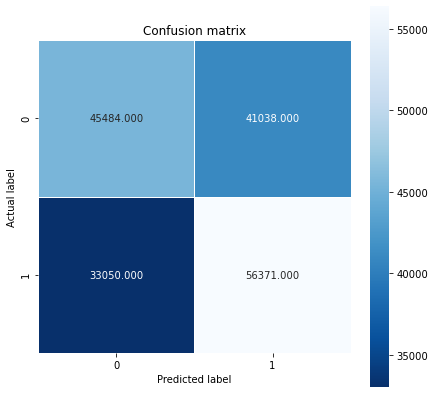

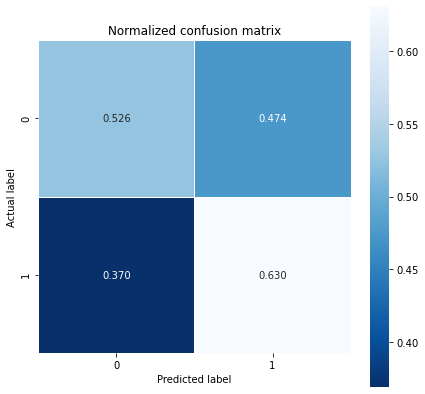

In [42]:
cm_2 = confusion_matrix(ytest, predicted_2)
cm_norm_2 = confusion_matrix(ytest, predicted_2, normalize="true")

plt.figure(figsize=(7,7))
sns.heatmap(cm_2, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Confusion matrix")

plt.figure(figsize=(7,7))
sns.heatmap(cm_norm_2, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Normalized confusion matrix")

## Clasificador Naive Bayes (Bernouilli)

In [43]:
from sklearn.naive_bayes import BernoulliNB

In [44]:
class_bern = BernoulliNB()

In [45]:
class_bern.fit(x_train_t, ytrain)

BernoulliNB()

In [46]:
predicted_bern = class_bern.predict(x_test_t)
predicted_bern

array([1, 1, 0, ..., 1, 1, 1])

In [47]:
print('--------------------------------------------------------')
score_bern = class_bern.score(x_test_t, ytest)
print('Accuracy Score: ', score_bern)
print('--------------------------------------------------------')
    
# Look at classification report to evaluate the model
print(classification_report(ytest, predicted_bern))

--------------------------------------------------------
Accuracy Score:  0.6449020421386472
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.60      0.62     86522
           1       0.64      0.69      0.66     89421

    accuracy                           0.64    175943
   macro avg       0.65      0.64      0.64    175943
weighted avg       0.65      0.64      0.64    175943



#### Chequeamos el overfitting

In [48]:
print('Score del conjunto de training: {:.4f}'.format(class_bern.score(x_train_t, ytrain)))
print('--------------------------------------')
print('Score del conjunto de testing: {:.4f}'.format(class_bern.score(x_test_t, ytest)))

Score del conjunto de training: 0.6459
--------------------------------------
Score del conjunto de testing: 0.6449


### Matriz de confusión

Text(0.5, 1.0, 'Normalized confusion matrix')

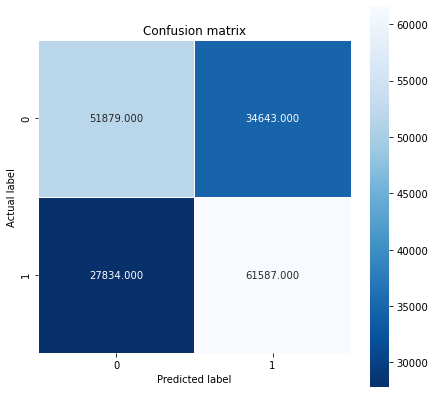

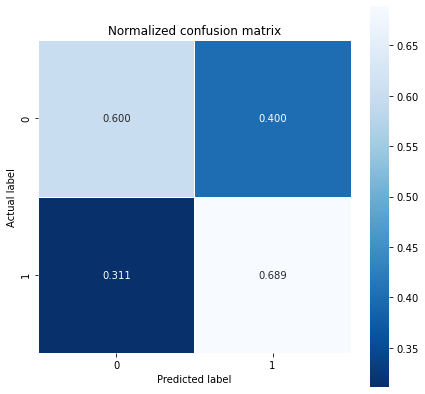

In [49]:
cm_bern = confusion_matrix(ytest, predicted_bern)
cm_norm_bern = confusion_matrix(ytest, predicted_bern, normalize="true")

plt.figure(figsize=(7,7))
sns.heatmap(cm_bern, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Confusion matrix")

plt.figure(figsize=(7,7))
sns.heatmap(cm_norm_bern, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Normalized confusion matrix")

### Curva ROC

In [50]:
predictions_proba_bern = class_bern.predict_proba(x_test_t)
predictions_proba_bern

array([[0.21357199, 0.78642801],
       [0.12312648, 0.87687352],
       [0.5017719 , 0.4982281 ],
       ...,
       [0.12183699, 0.87816301],
       [0.18624808, 0.81375192],
       [0.23236423, 0.76763577]])

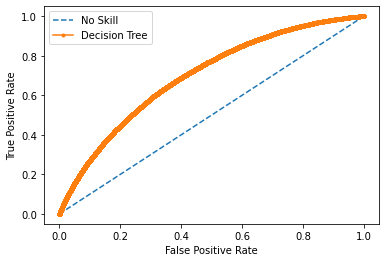

In [51]:
# keep probabilities for the positive outcome only
yhat_bern = predictions_proba_bern[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat_bern)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [52]:
from sklearn.naive_bayes import CategoricalNB

In [68]:
otro = xtrain[list(xtrain.select_dtypes(include=['object']).columns)]

In [70]:
otro

,grade,sub_grade,home_ownership,purpose,addr_state,issue_month
405387,A,A5,MORTGAGE,debt_consolidation,CO,Feb
234295,C,C1,OWN,other,CA,Dec
312077,B,B2,MORTGAGE,debt_consolidation,RI,Jul
292927,D,D3,RENT,credit_card,TX,Sep
158822,E,E2,MORTGAGE,credit_card,AL,May
...,...,...,...,...,...,...
1429,B,B4,MORTGAGE,debt_consolidation,TX,Jun
373782,B,B3,MORTGAGE,credit_card,LA,Apr
412304,D,D2,RENT,major_purchase,NV,Feb
92961,C,C5,MORTGAGE,debt_consolidation,TX,Aug


In [53]:
model_cat = CategoricalNB()

In [67]:
model_cat.fit(otro, ytrain)

ValueError: invalid literal for int() with base 10: 'A'

In [ ]:
predicted_cat = model_cat.predict(x_test_t)
predicted_cat

In [ ]:
print('--------------------------------------------------------')
score__cat = model_cat.score(x_test_t, ytest)
print('Accuracy Score: ', score_cat)
print('--------------------------------------------------------')
    
# Look at classification report to evaluate the model
print(classification_report(ytest, predicted_cat))

#### Chequeamos el overfitting

In [ ]:
print('Score del conjunto de training: {:.4f}'.format(model_cat.score(x_train_t, ytrain)))
print('--------------------------------------')
print('Score del conjunto de testing: {:.4f}'.format(model_cat.score(x_test_t, ytest)))